In [1]:
# import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfUmbrella = pd.read_excel("D:/BDS2/block 3/Predication & Forecasting/Assignment 1/Umbrella.xlsx")

In [3]:
###########################################################
### fPlot84() page 84
from matplotlib.ticker import MultipleLocator
def fPlot84(dfUmbrella):
    x_values = np.arange(1, 6, 0.25)
    plt.figure(dpi=300)
    plt.plot(x_values, dfUmbrella["Umbrella Sales"], color='green', marker='o', linestyle='-')

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    # Set the vertical scale from 0 to 180
    plt.yticks(np.arange(0, 181, 20))
    # Set non-primary scale labels to empty strings
    plt.yticks(np.arange(0, 181, 5), labels=["" if i % 20 != 0 else str(i) for i in range(0, 181, 5)], minor=True)

    plt.show()

    return

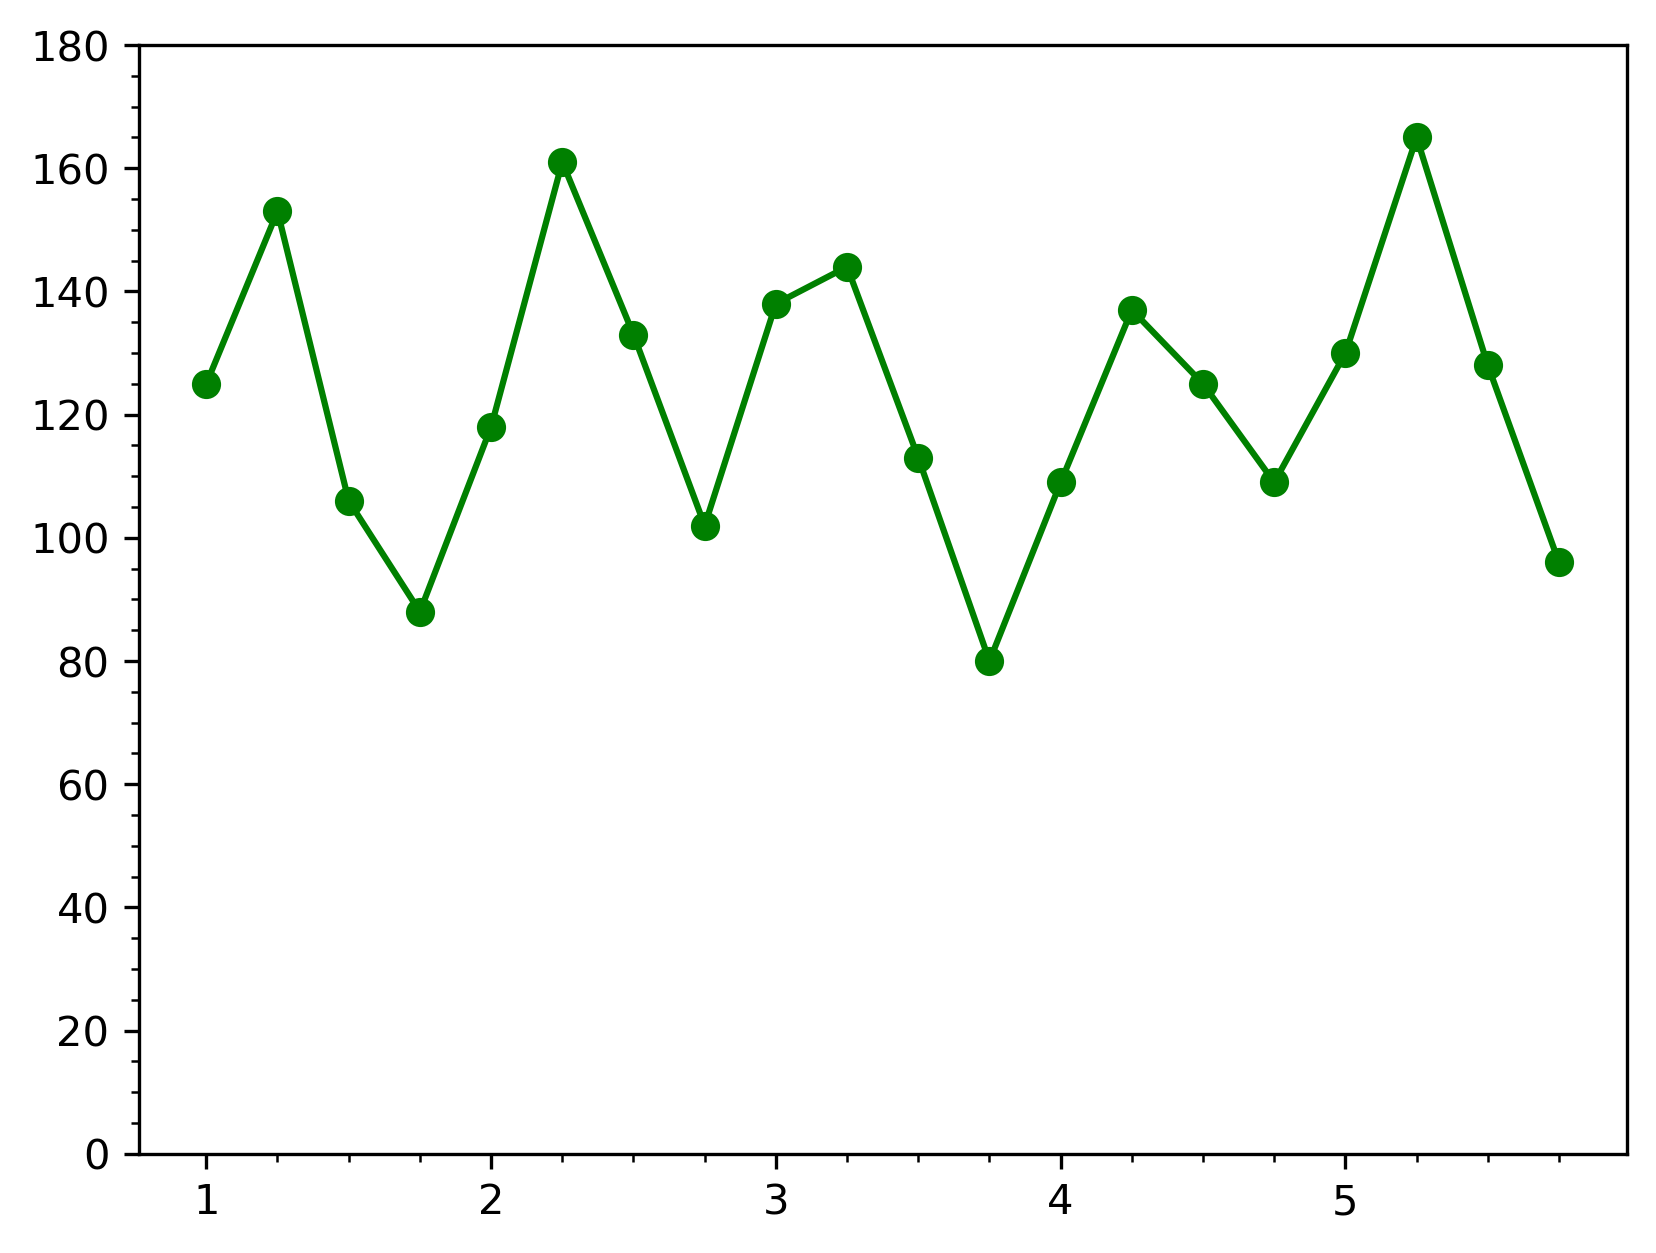

In [4]:
fPlot84(dfUmbrella)

In [5]:
def fSeasonal_HW_Multi(vYt, sSeason, dAlpha, dBeta, dGamma):
    
    iN = len(vYt)
    if sSeason == 'seasonal':
        iS = 4
    elif sSeason == 'monthly':
        iS = 12
    vYt_hat = np.zeros(iN - iS - 1)
    dLt = np.mean(vYt[: iS])
    dGt = (np.mean(vYt[iS: 2 * iS]) - dLt) / iS
    vHt = np.zeros(iN)
    vHt[: iS] = vYt[: iS] / dLt
    
    for i in range(len(vYt_hat)):
        dLt_new = dAlpha * (vYt[i + iS] / vHt[i]) + (1 - dAlpha) * (dLt + dGt)
        dGt = dBeta * (dLt_new - dLt) + (1 - dBeta) * dGt
        vHt[iS + i] = dGamma * vYt[i + iS] / dLt_new + (1 - dGamma) * vHt[i]
        vYt_hat[i] = vHt[i + 1] * (dLt_new + dGt)
        dLt = dLt_new
    vYt_hat = np.round(vYt_hat, 2)
        
    return vYt_hat

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def fPlot85(dfUmbrella):
    x_values = np.arange(1, 6, 0.25)
    plt.figure(dpi=300)

    # Plotting the original data
    plt.plot(x_values, dfUmbrella["Umbrella Sales"], color='green', marker='o', linestyle='-')

    # Seasonal decomposition
    result = seasonal_decompose(dfUmbrella["Umbrella Sales"], model='multiplicative', period=4)
    trend_line = result.trend

    # Plotting the trend line
    plt.plot(x_values, trend_line, color='red', linestyle='-', label='Trend (seasonal_decompose)')

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    # Set the vertical scale from 0 to 175
    plt.yticks([0, 100, 125, 150, 175])

    # Set non-primary scale labels to empty strings
    minor_ticks = []
    for i in range(len(plt.yticks()[0])-1):
        minor_ticks.append((plt.yticks()[0][i] + plt.yticks()[0][i+1]) / 2)

    plt.yticks(minor_ticks, labels=["" for _ in range(len(minor_ticks))], minor=True)

    plt.show()

    return

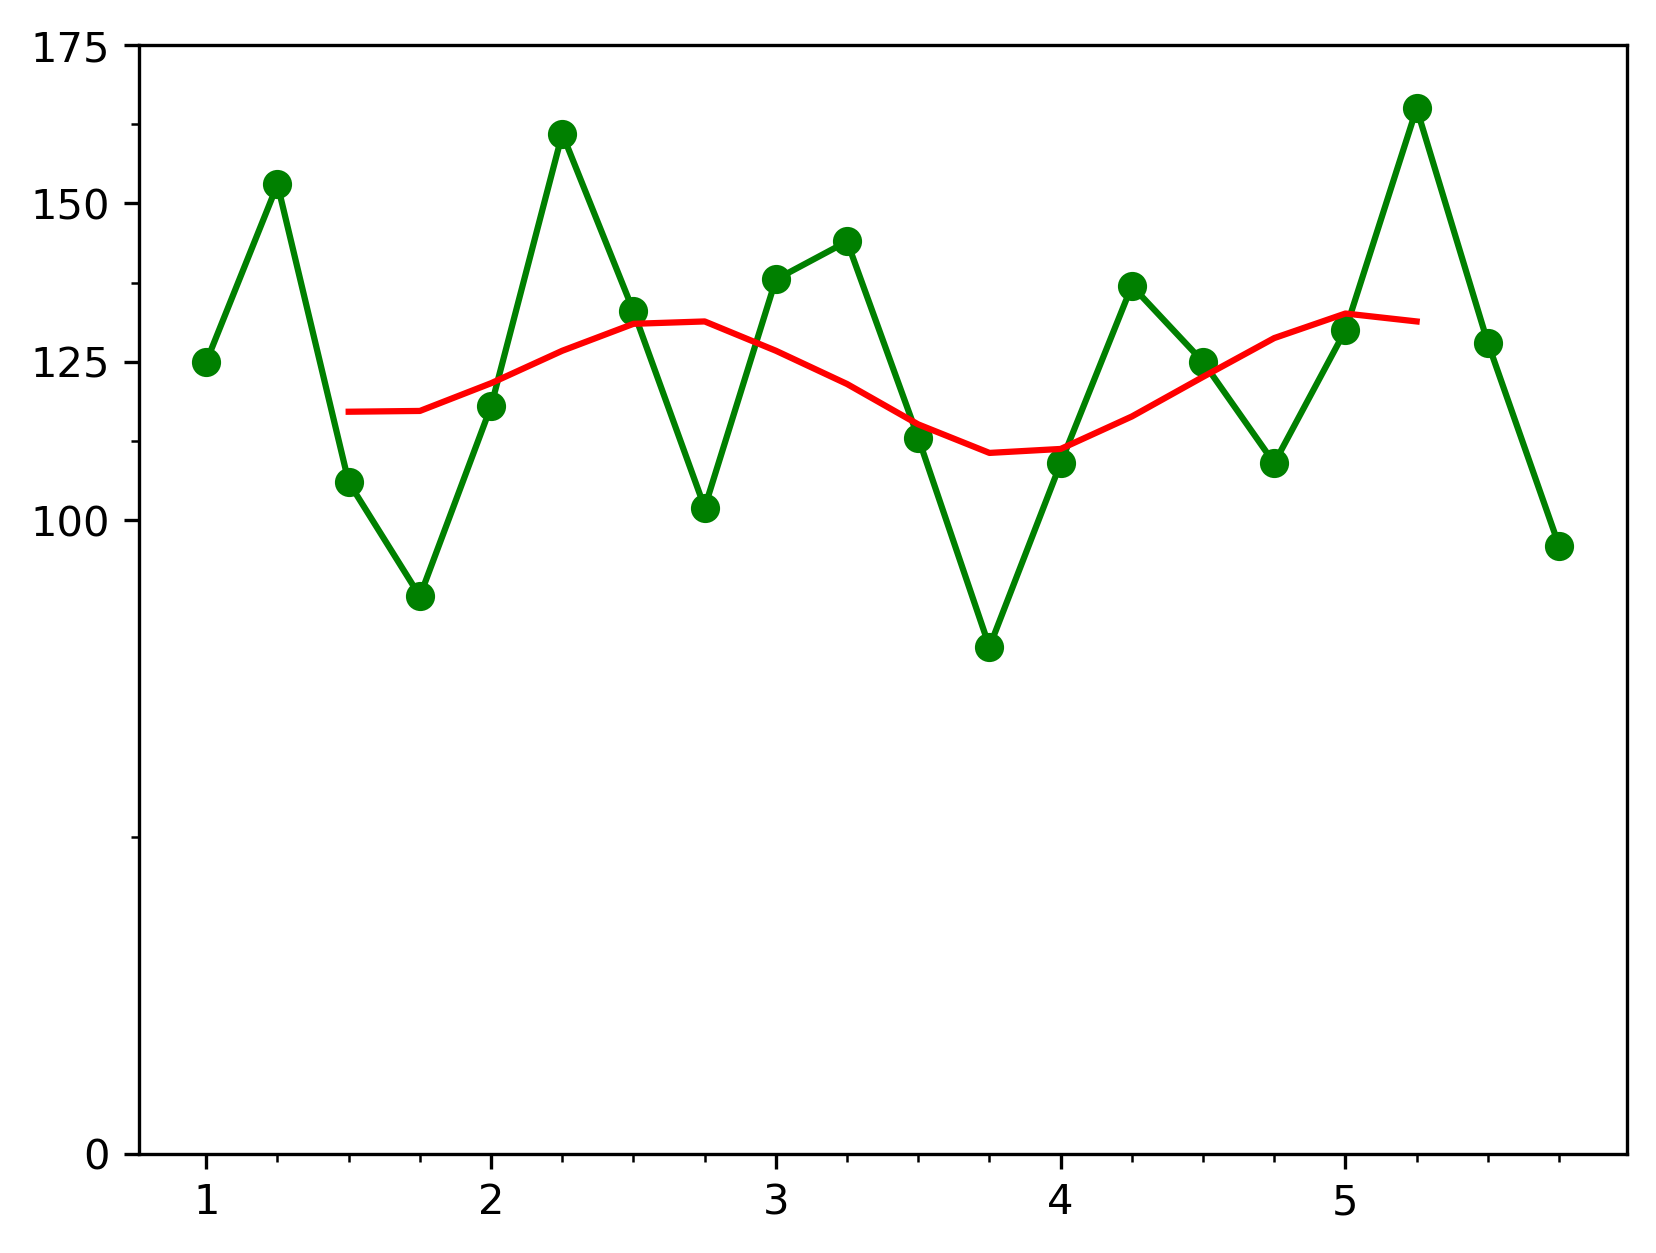

In [7]:
fPlot85(dfUmbrella)

In [8]:
def fPlot85_G2(dfUmbrella):
    x_values = np.arange(1, 6, 0.25)
    plt.figure(dpi=300)

    result = seasonal_decompose(dfUmbrella["Umbrella Sales"], model='multiplicative', period=4)

    residuals = dfUmbrella["Umbrella Sales"] - result.trend

    plt.plot(x_values, residuals, color='blue', linestyle='-', marker='o')

    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    # Set the vertical scale from -25 to 25
    plt.yticks([-25,0,25])

    plt.show()
    return

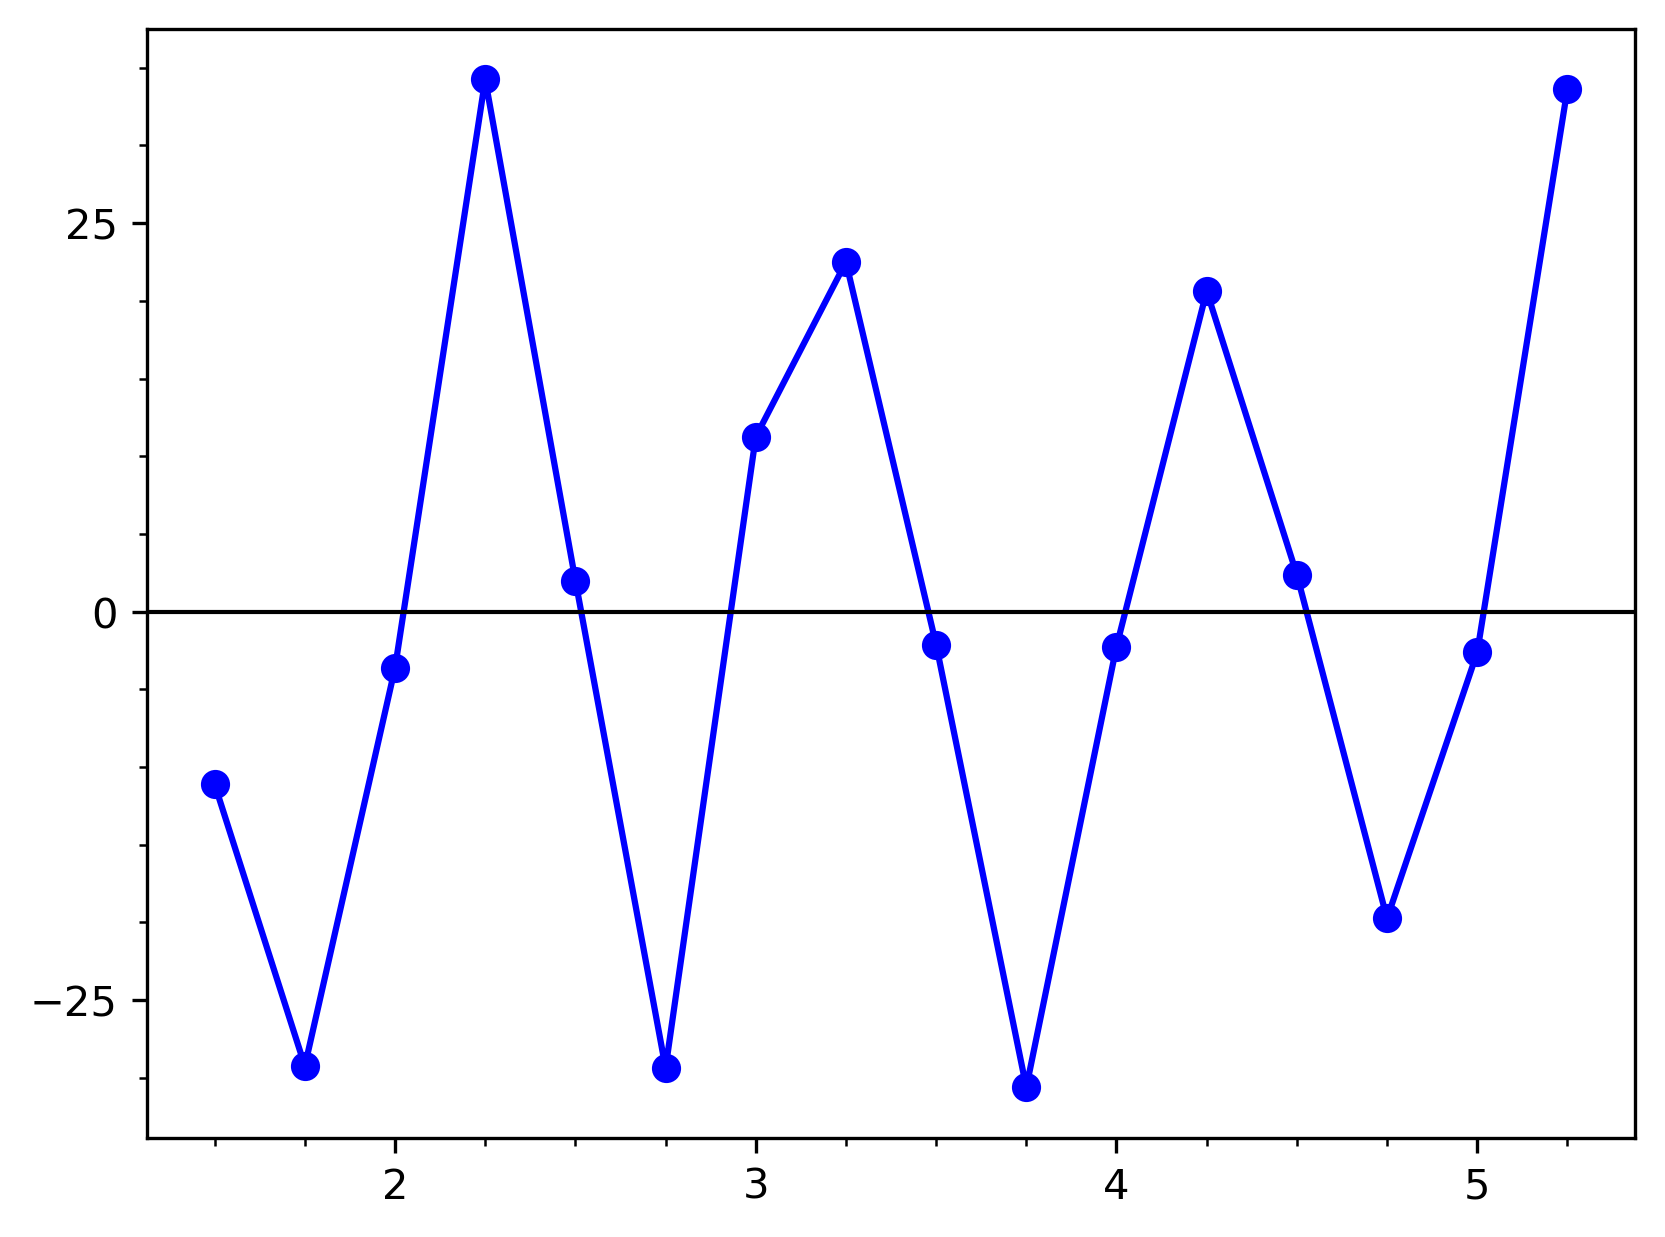

In [9]:
fPlot85_G2(dfUmbrella)

In [16]:
def fPlot86(dfUmbrella):
    x_values_original = np.arange(1, 6, 0.25)
    x_values_forecast = np.arange(6, 8, 0.25)
    plt.figure(dpi=300)

    # Plotting the original data
    plt.plot(x_values_original[:20], dfUmbrella["Umbrella Sales"][:20], color='green', marker='o', linestyle='-')

    plt.minorticks_on()
    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)
    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    # Set the vertical scale from 0 to 180
    plt.yticks(np.arange(0, 181, 20))
    # Set non-primary scale labels to empty strings
    plt.yticks(np.arange(0, 181, 5), labels=["" if i % 20 != 0 else str(i) for i in range(0, 181, 5)], minor=True)

    # Seasonal decomposition for forecasting
    result = seasonal_decompose(dfUmbrella["Umbrella Sales"][:20], model='multiplicative', period=4)
    
    # Creating 8 forecasting data points
    forecast_model = ExponentialSmoothing(result.trend, seasonal='mul', seasonal_periods=4)
    forecast = forecast_model.fit()
    forecast_values = forecast.forecast(8)

    # Plotting the forecasted data in blue
    plt.plot(x_values_forecast, forecast_values, color='blue', marker='o', linestyle='-')

    # Plotting a vertical black line to separate original and forecasted data
    plt.axvline(x=x_values_original[-1], color='black', linestyle='-', linewidth=1)

    return plt

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

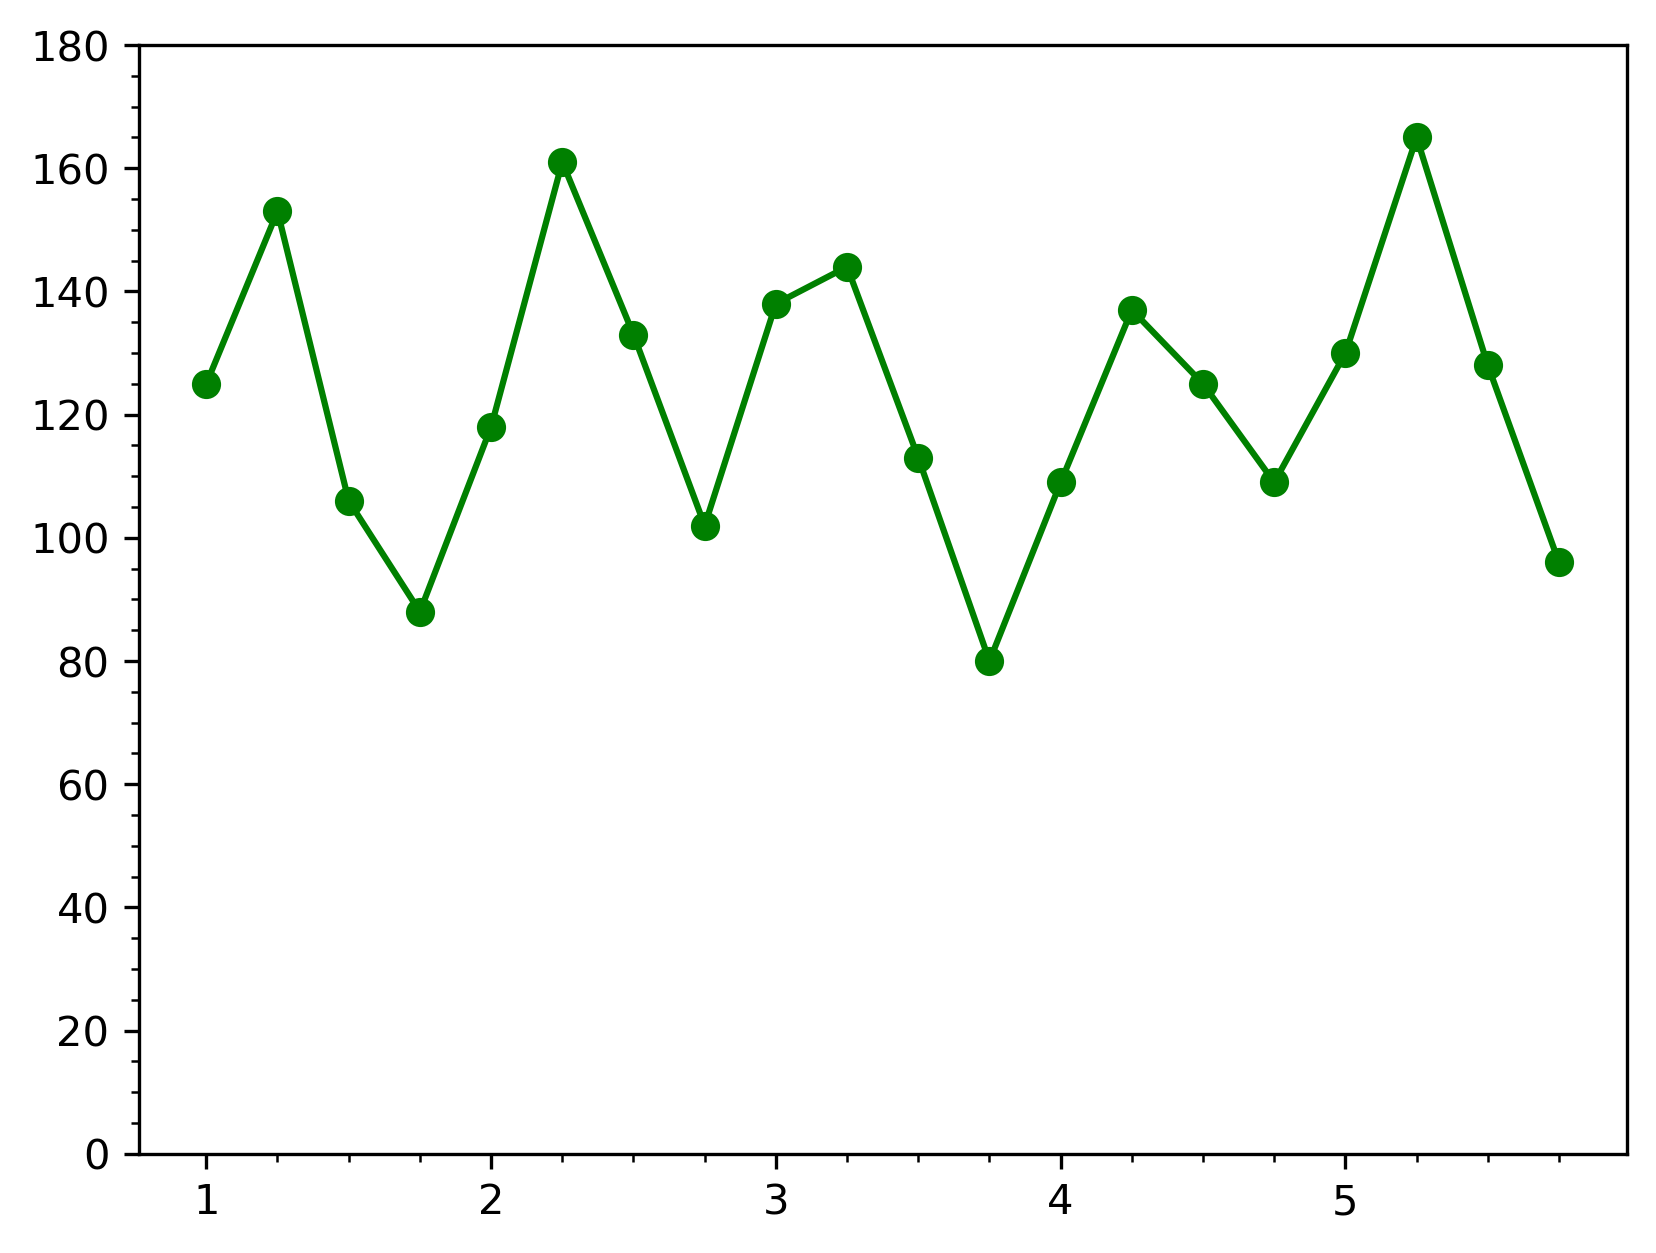

In [17]:
fPlot86(dfUmbrella)